In [1]:
from b_tools.preprocess import get_standardized_measures

In [2]:
DATASET='20'

In [3]:
seq = get_standardized_measures(f'results/sequential_{DATASET}.csv')
seq_time_tot = seq['TOTAL'].mean()
seq_time_freq = seq['FREQCALC'].mean()

In [4]:
data = get_standardized_measures(f'results/thr_{DATASET}.csv', excluded_columns=['P_DEGREE'])

In [5]:
data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,TOTAL
0,1,26897318,324229967,278803,351406088
1,1,27054057,329935332,280634,357270023
2,2,26417020,163422654,278104,190117778
3,2,26644983,163294488,280744,190220215
4,3,26995989,109725181,286713,137007883
5,3,26462951,110430923,288041,137181915
6,4,27183810,82625176,293317,110102303
7,4,27104203,83484087,286116,110874406
8,5,26677634,66650715,269151,93597500
9,5,26421941,67026894,260546,93709381


In [6]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

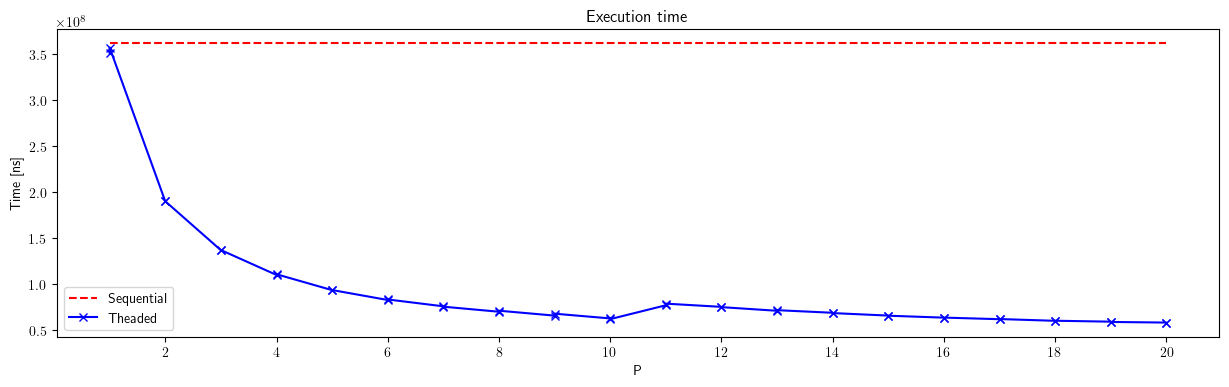

In [7]:
# setting up the plot
plt.figure(figsize=(15,4))
plt.title('Execution time')
plt.xticks(range(0, len(data['P_DEGREE']), 2))
plt.xlabel("P")
plt.ylabel("Time [ns]")
# sequential
plt.plot(data['P_DEGREE'], [seq_time_tot for _ in range(len(data['P_DEGREE']))], '--r')
# parallel
plt.plot(data['P_DEGREE'], data['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Outlier detection and mean

Here we remove the outliers for the data and we compute the mean

In [8]:
import pandas as pd

In [9]:
# compute the mean for each group
sp_data = data.groupby('P_DEGREE', as_index=False).median()

In [10]:
sp_data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,TOTAL
0,1,26975687.5,327082649.5,279718.5,354338055.5
1,2,26531001.5,163358571.0,279424.0,190168996.5
2,3,26729470.0,110078052.0,287377.0,137094899.0
3,4,27144006.5,83054631.5,289716.5,110488354.5
4,5,26549787.5,66838804.5,264848.5,93653440.5
5,6,26561384.0,56343950.0,274111.0,83179445.0
6,7,26984763.5,48567738.5,274947.0,75827449.0
7,8,26602097.5,43812059.0,274915.0,70689071.5
8,9,26720902.0,39970401.5,271599.0,66962902.5
9,10,26529700.5,35697813.0,261611.0,62489124.5


# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [11]:
sp_data['S_p'] = sp_data['TOTAL'].map(lambda x: seq_time_tot / x)

In [12]:
sp_data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,TOTAL,S_p
0,1,26975687.5,327082649.5,279718.5,354338055.5,1.021803
1,2,26531001.5,163358571.0,279424.0,190168996.5,1.903905
2,3,26729470.0,110078052.0,287377.0,137094899.0,2.640971
3,4,27144006.5,83054631.5,289716.5,110488354.5,3.276939
4,5,26549787.5,66838804.5,264848.5,93653440.5,3.865994
5,6,26561384.0,56343950.0,274111.0,83179445.0,4.352802
6,7,26984763.5,48567738.5,274947.0,75827449.0,4.774836
7,8,26602097.5,43812059.0,274915.0,70689071.5,5.121918
8,9,26720902.0,39970401.5,271599.0,66962902.5,5.406929
9,10,26529700.5,35697813.0,261611.0,62489124.5,5.794026


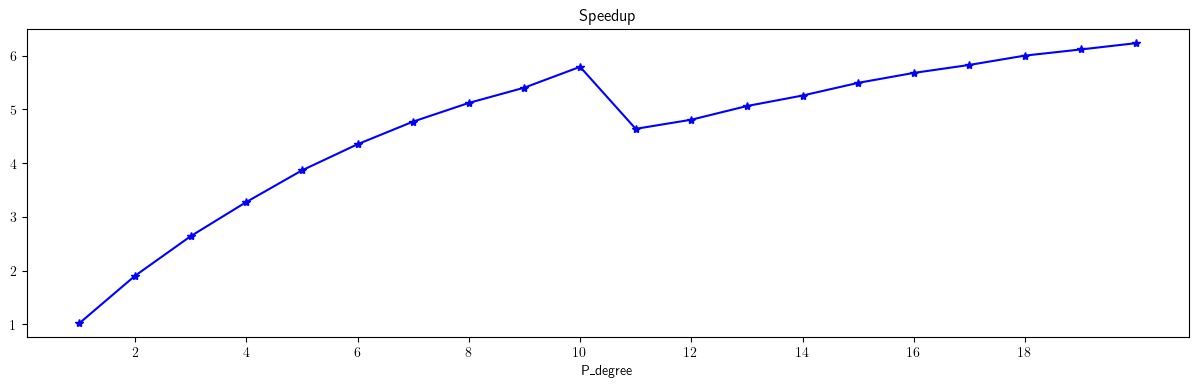

In [13]:
# plot results
plt.figure(figsize=(15,4))
plt.title("Speedup")
plt.xlabel('P_{degree}')
plt.xticks(range(0, len(sp_data), 2))

plt.plot(sp_data['P_DEGREE'], sp_data['S_p'], '*-b')

# Scalability

Compute the scalability that is $S_n=\frac{T(1)}{T(N)}$

In [14]:
time_n0 = sp_data[sp_data['P_DEGREE'] == 1]['TOTAL']
time_n0

0    354338055.5
Name: TOTAL, dtype: float64

In [15]:
sp_data['S_c'] = sp_data['TOTAL'].map(lambda x: time_n0 / x)

/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


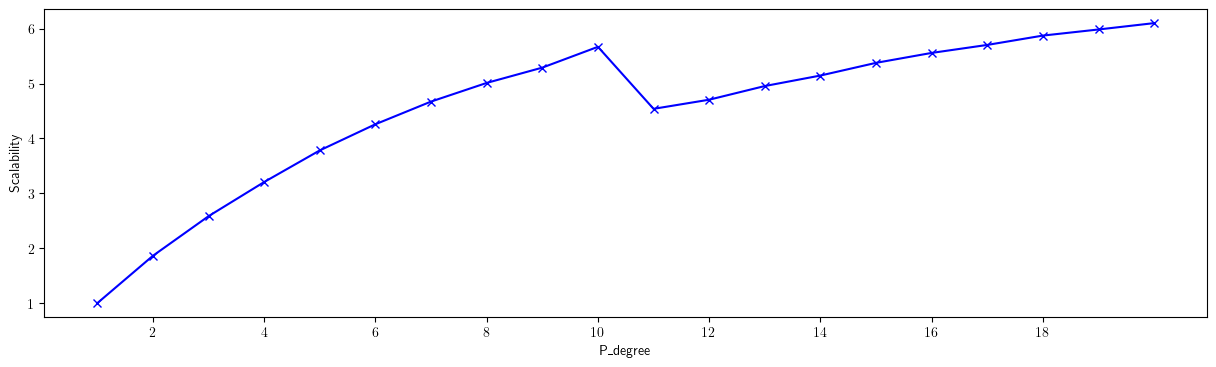

In [16]:
# plot results
plt.figure(figsize=(15,4))
plt.xticks(range(0, len(sp_data), 2))
plt.xlabel('P_{degree}')
plt.ylabel('Scalability')

plt.plot(sp_data['P_DEGREE'], sp_data['S_c'], 'x-b')